# Advaned Visualizations using Seaborn

While matplotlib provides simple visualiation charts that are easy to generate, the `seaborn` library provide more sophiticated charts often handly to present complex data from the bioinformatics.

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Seaborn has three categories of charts - *relplot* (relational), *displot* (distributions) and *catplot* (categories).

![Searborn organization](images/seaborn-organization.png)
    
From [Seaborn Tutorial](https://seaborn.pydata.org/tutorial/function_overview.html).

### Palmer Penguins

![Palmer Penguins](images/lter_penguins2.png)

In this section, we'll use [Palmer Penguins dataset](https://github.com/allisonhorst/palmerpenguins), which is comes packaged with seaborn.

The dataset includes measurements for penguin species, island in Palmer Archipelago, size (flipper length, body mass, bill dimensions), and sex. 

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("penguins")

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.shape

(344, 7)

While seaborn can ignore missing values when plotting, it may be good idea in general to clean the data to remove missing values before starting any exploration.

In [6]:
# number of missing values in each column
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
# drop the rows with missing value
df.dropna(inplace=True)

In [8]:
# number of rows and columns in the data after dropping rows with missing values
df.shape

(333, 7)

### Scatterplot

In [9]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


The scatter plot allows visualizing two dimentions. More dimentions can be added a scatter plot to control color, size and style.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

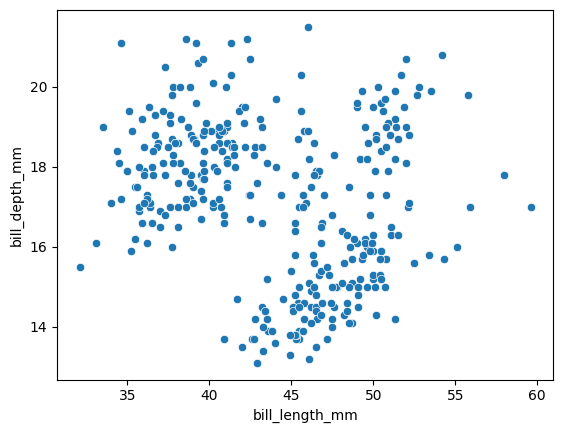

In [10]:
# scatterplot of bill length vs bill depth
sns.scatterplot(df, x="bill_length_mm", y="bill_depth_mm")

The *scatterplot* is a special kind of *relplot*. We can get the same output using the following ways as well.

When we specify both `x` and `y` arguments to 
```
sns.relplot(df, x="bill_length_mm", y="bill_depth_mm")
```

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

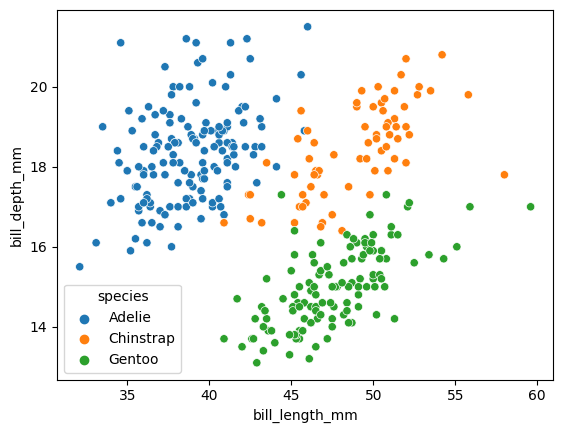

In [14]:
# scatterplot of bill length vs bill depth 
# with color by the species
sns.scatterplot(df, 
                x="bill_length_mm", 
                y="bill_depth_mm", 
                hue="species")

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

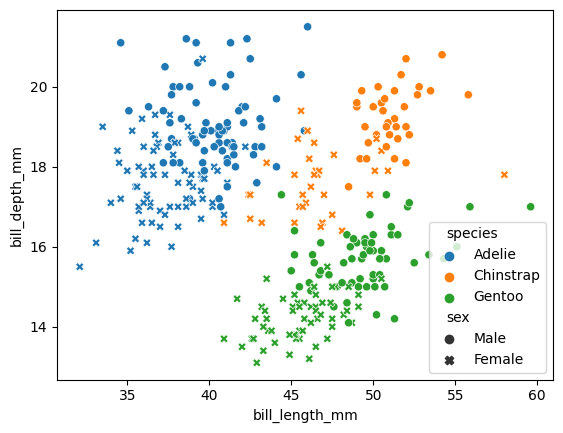

In [15]:
# scatterplot of bill length vs bill depth 
# with color by the species and style by sex
sns.scatterplot(df, 
                x="bill_length_mm", 
                y="bill_depth_mm", 
                hue="species", 
                style="sex")

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

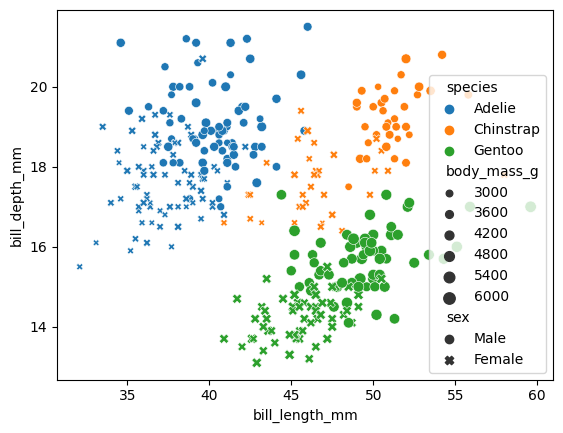

In [16]:
# scatterplot of bill length vs bill depth 
# with color by the species, style by sex and size by body weight
sns.scatterplot(df, x="bill_length_mm", y="bill_depth_mm", 
                hue="species", style="sex", size="body_mass_g")

Seaborn allows drawing lines on the graphs using matplotlib primitives.

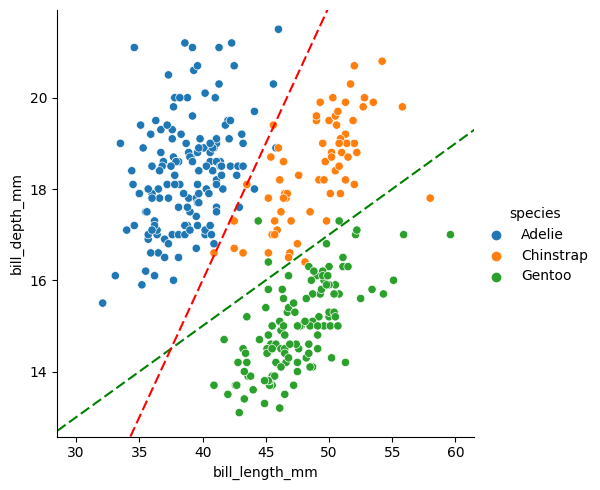

In [17]:
g = sns.relplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue='species')

# draw a line using start and end points
g.ax.axline(xy1=(30, 13), xy2=(60, 19), color="g", dashes=(5, 2))

# draw a line using start point and slope
g.ax.axline(xy1=(35, 13), slope=.6, color="r", dashes=(5, 2))

## Distributions

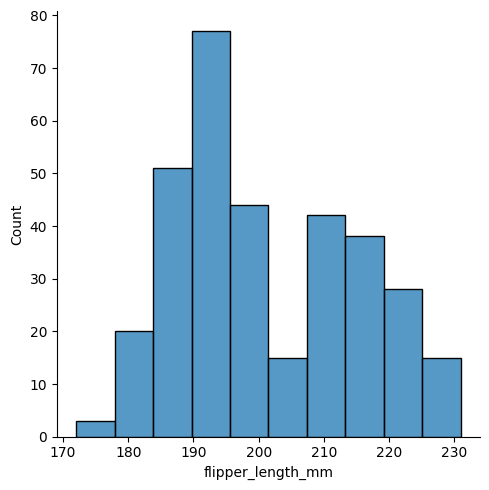

In [20]:
sns.displot(df, x="flipper_length_mm", kind="hist")

# sns.histplot(df, x="flipper_length_mm")

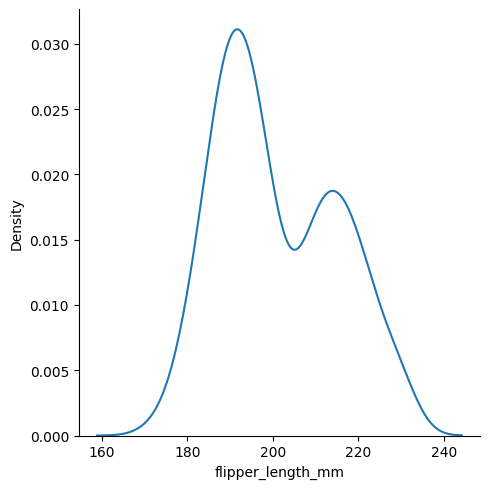

In [21]:
sns.displot(df, x="flipper_length_mm", kind="kde")

# sns.kdetplot(df, x="flipper_length_mm")

The distplots allow grouping by color.

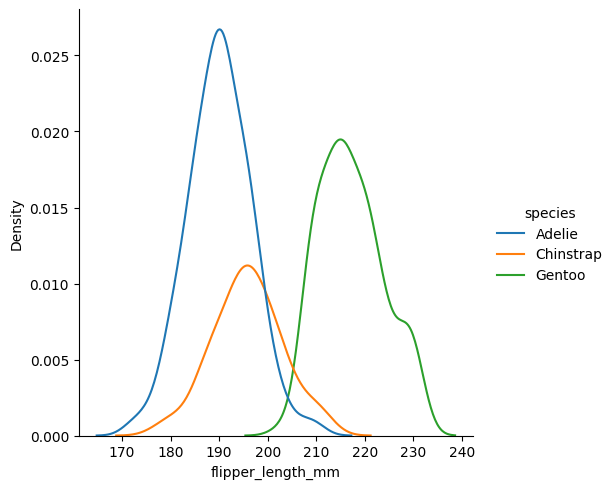

In [22]:
sns.displot(df, x="flipper_length_mm", kind="kde", hue="species")

We can stack multiple distributions on top of each other.

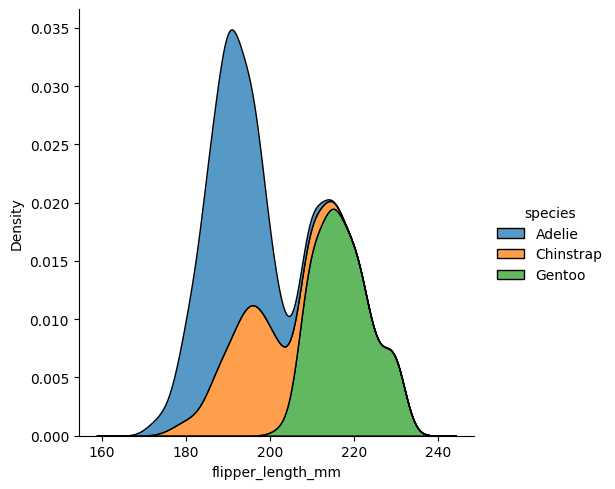

In [23]:
sns.displot(df, x="flipper_length_mm", kind="kde", 
            hue="species", multiple="stack")

We could do the same with histograms.

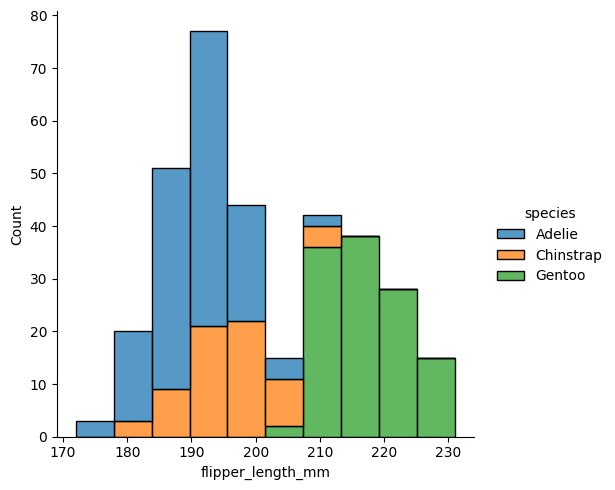

In [24]:
sns.displot(df, x="flipper_length_mm", kind="hist", 
            hue="species", multiple="stack")

## Categorical plots

Catplots allows visualizaing categorical data. The default view is a scatter plot with a small jitter added to make the points visible. 

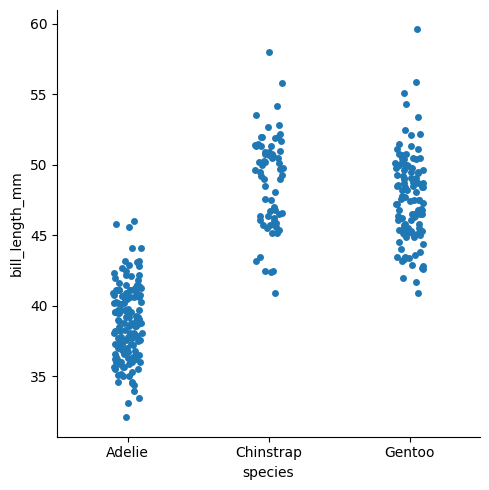

In [25]:
sns.catplot(df, x="species", y="bill_length_mm")

A slightly better looking version of that is a swarm plot.

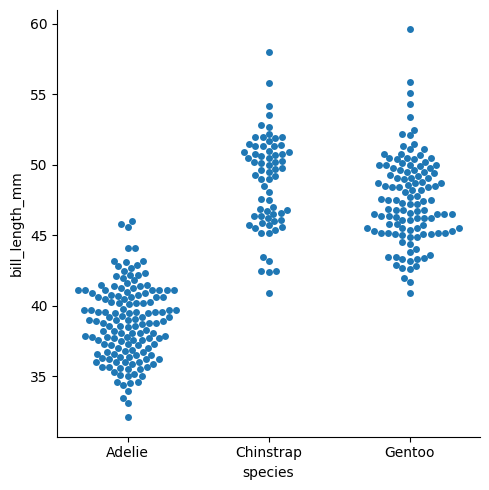

In [26]:
sns.catplot(df, x="species", y="bill_length_mm", kind="swarm")

we can add another dimension usng hue.

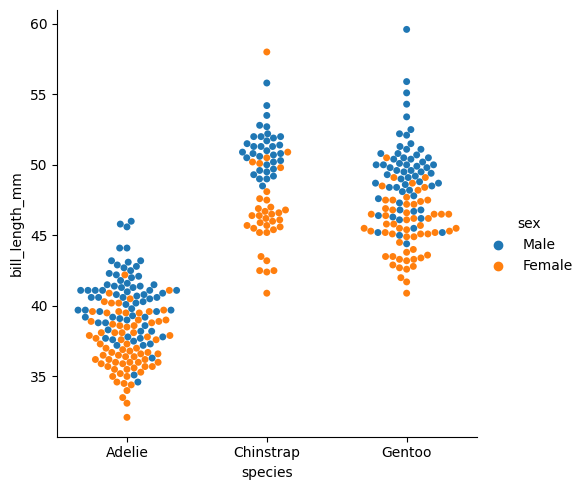

In [27]:
sns.catplot(df, x="species", y="bill_length_mm", kind="swarm", hue="sex")

We could even flip the axes, if we want.

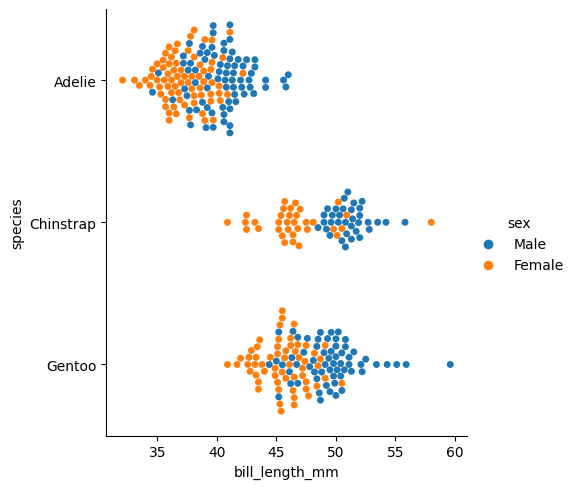

In [28]:
sns.catplot(df, x="bill_length_mm", y="species", kind="swarm", hue="sex")

## Comparing Distributions

The *boxplot* and *voilinplot*, kinds of catplots, allows comparing distributions.

<Axes: ylabel='bill_length_mm'>

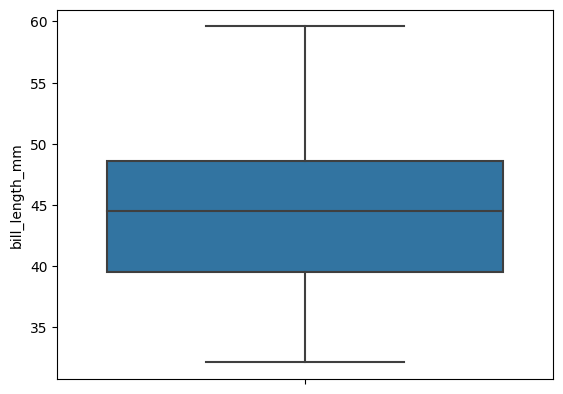

In [29]:
sns.boxplot(df, y='bill_length_mm')

<Axes: ylabel='bill_length_mm'>

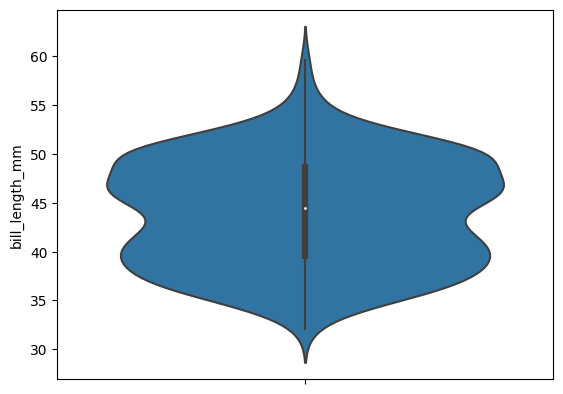

In [30]:
sns.violinplot(df, y='bill_length_mm')

Both these plots allow splitting the distribution by a categorical column.

<Axes: xlabel='species', ylabel='bill_length_mm'>

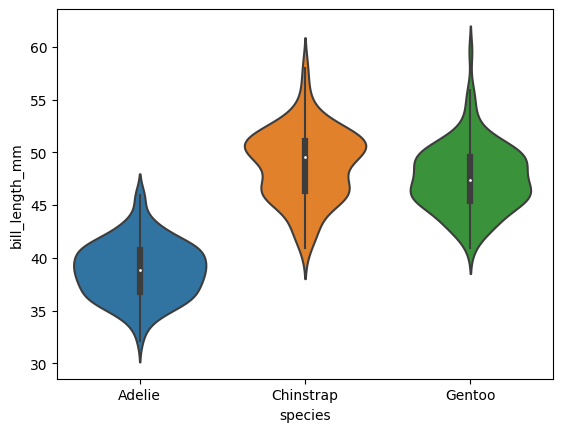

In [31]:
sns.violinplot(df, y='bill_length_mm', x="species")

We could add another dimension using hue.

<Axes: xlabel='species', ylabel='bill_length_mm'>

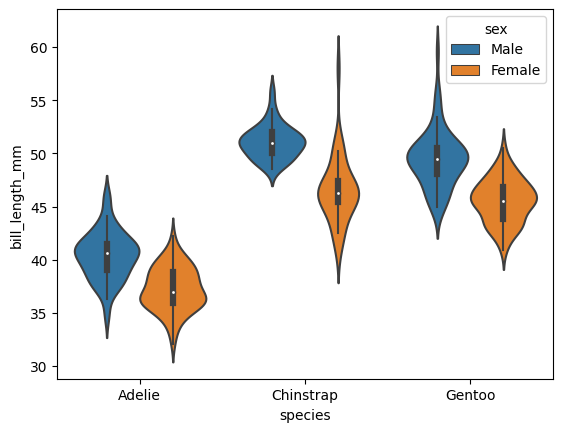

In [32]:
sns.violinplot(df, y='bill_length_mm', x="species", hue="sex")

We could use the space better by splitting the violin when there are only two categories.

<Axes: xlabel='species', ylabel='bill_length_mm'>

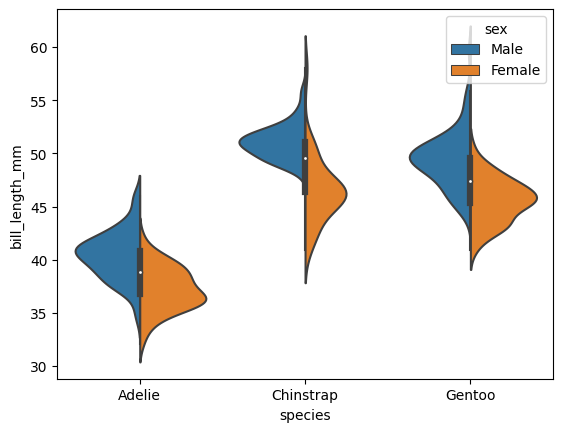

In [33]:
sns.violinplot(df, y='bill_length_mm', x="species", hue="sex", split=True)

### Combining multiple views on the data

The `jointplot` and `pairplot` plots both relationships and distubutions in a single graph. 

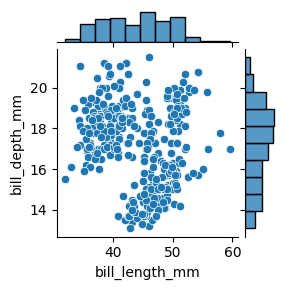

In [35]:
sns.jointplot(df, x="bill_length_mm", y="bill_depth_mm", height=3)

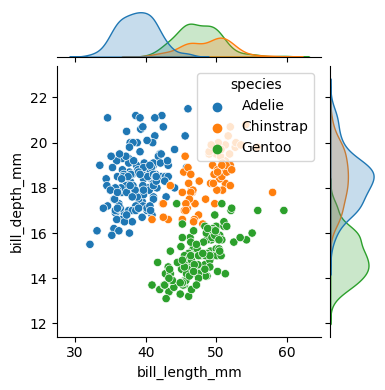

In [38]:
sns.jointplot(df, x="bill_length_mm", y="bill_depth_mm", hue="species", height=4)

The pairplot show relations between all the numerical columns in a single grid.

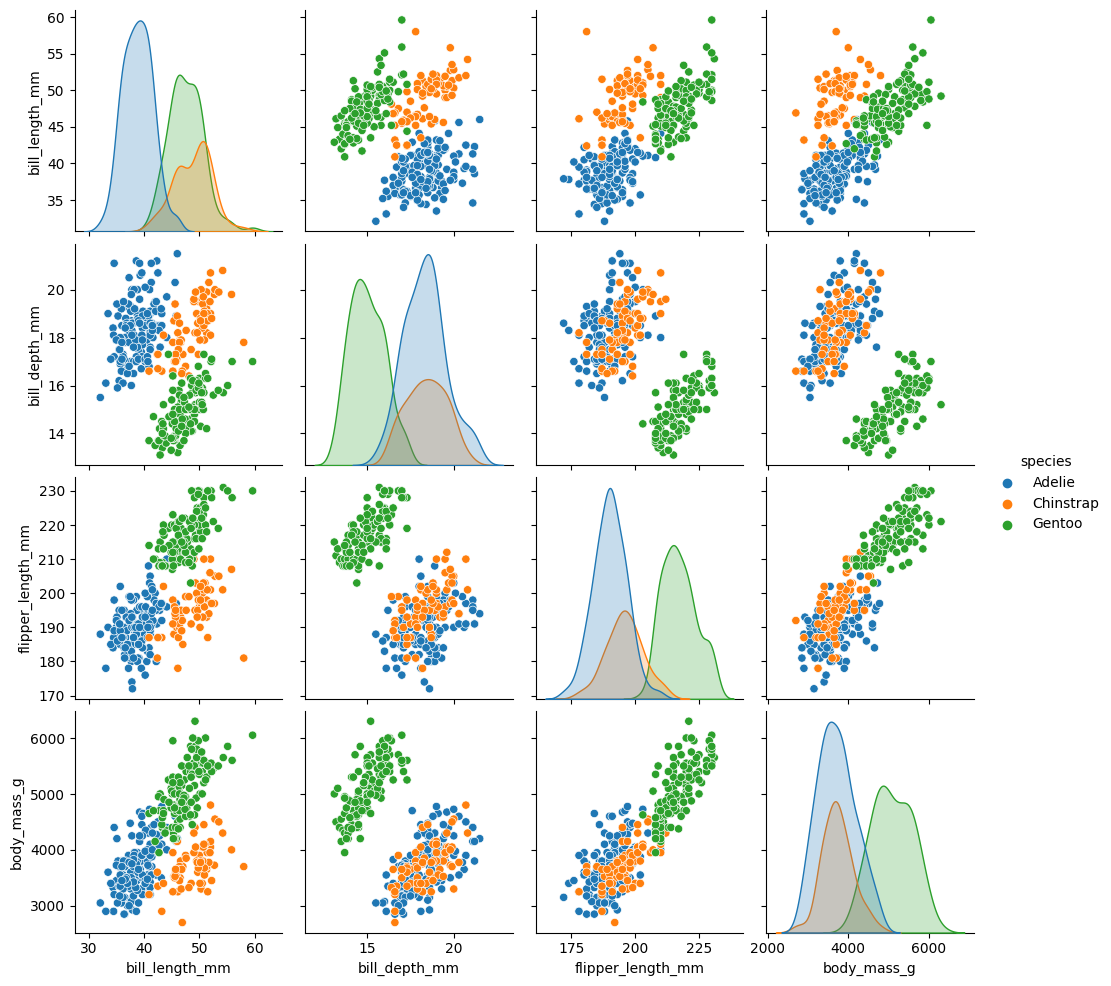

In [39]:
sns.pairplot(data=df, hue="species")

### Showing multiple charts

Seaborn allows showing a grip of charts for displaying more information.

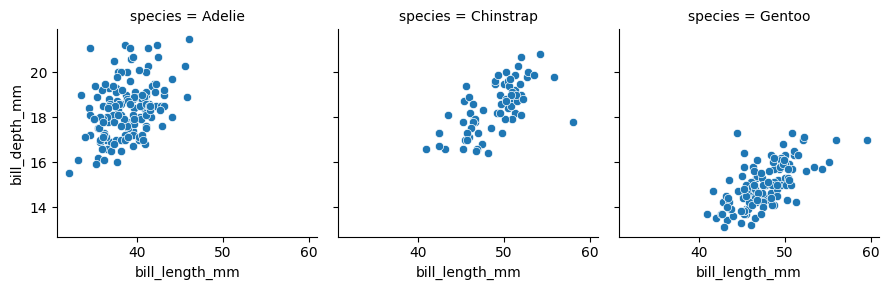

In [40]:
sns.relplot(df, x="bill_length_mm", y="bill_depth_mm", col="species", height=3)

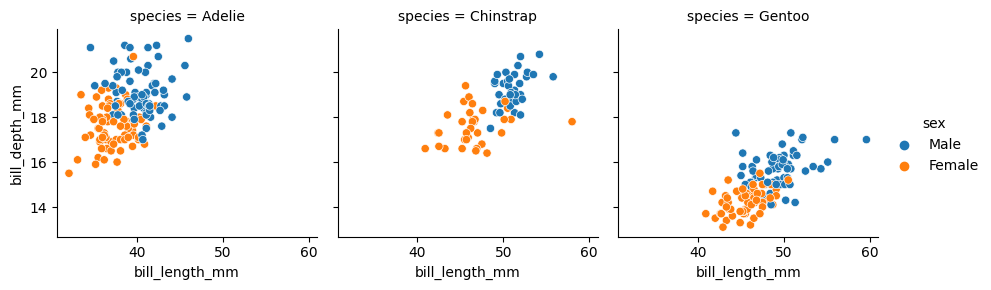

In [41]:
sns.relplot(df, x="bill_length_mm", y="bill_depth_mm", hue="sex",
            col="species", height=3)

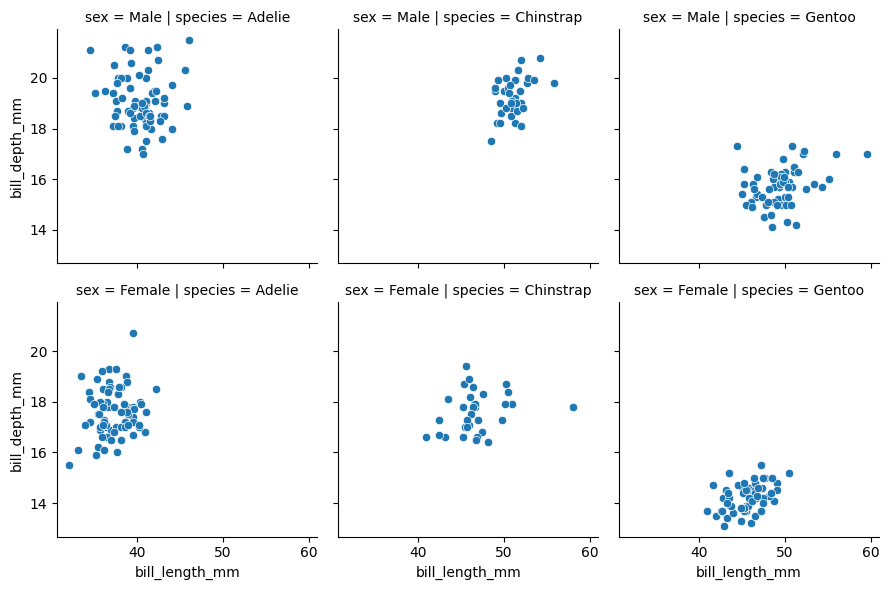

In [42]:
sns.relplot(df, x="bill_length_mm", y="bill_depth_mm", 
            col="species", row="sex", height=3)

When there are too many categories, we can even specify `col_wrap`.

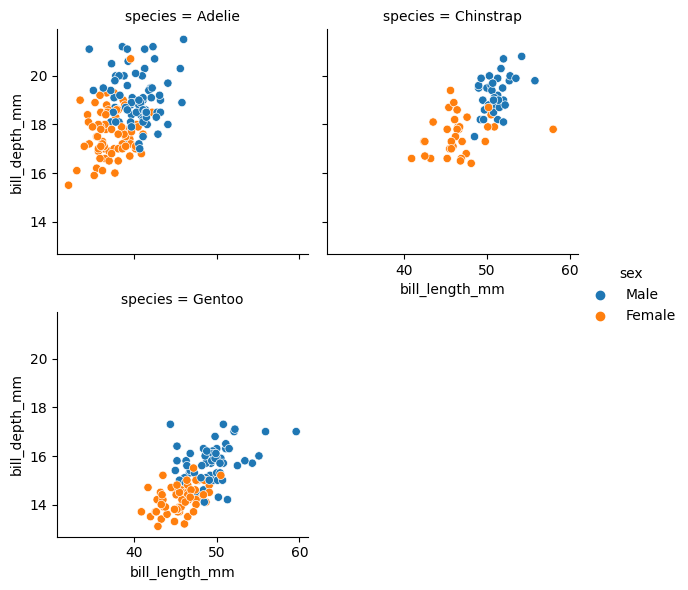

In [43]:
sns.relplot(df, x="bill_length_mm", y="bill_depth_mm", hue="sex", 
            col="species", col_wrap=2, height=3)

This functionality is similar to Facetwrap in R.

### Multiple Charts in a grid

In [44]:
import matplotlib.pyplot as plt

<Axes: xlabel='species', ylabel='Count'>

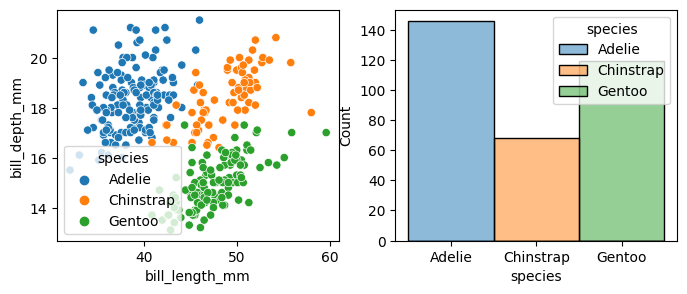

In [51]:
f, axs = plt.subplots(1, 2, figsize=(8, 3))
sns.scatterplot(df, x="bill_length_mm", y="bill_depth_mm", hue="species", ax=axs[0])
sns.histplot(df, x="species", hue="species", ax=axs[1])


### Questions?

Can we visualize using the metadata of a GSE dataset?

In [56]:
%%file metadata.csv
Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,Experiment,Genotype,Instrument,Library Name,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,Strain,Time,Tissue,Treatment
SRR23883665,RNA-Seq,302,14570988714,PRJNA945489,SAMN33788173,4506627774,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERSITY OF UTAH",public,"fastq,sra","s3,ncbi,gs","gs.US,s3.us-east-1,ncbi.public",SRX19695587,psap knockout,Illumina NovaSeq 6000,GSM7102585,PAIRED,cDNA,TRANSCRIPTOMIC,Danio rerio,ILLUMINA,2023-03-18T00:00:00Z,2023-03-17T18:24:00Z,1,GSM7102585,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
SRR23883666,RNA-Seq,302,15735211096,PRJNA945489,SAMN33788174,4876663288,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERSITY OF UTAH",public,"fastq,sra","s3,ncbi,gs","gs.US,s3.us-east-1,ncbi.public",SRX19695586,wildtype,Illumina NovaSeq 6000,GSM7102584,PAIRED,cDNA,TRANSCRIPTOMIC,Danio rerio,ILLUMINA,2023-03-18T00:00:00Z,2023-03-17T18:22:00Z,1,GSM7102584,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
SRR23883667,RNA-Seq,302,13975310928,PRJNA945489,SAMN33788175,4356073817,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERSITY OF UTAH",public,"fastq,sra","gs,ncbi,s3","gs.US,s3.us-east-1,ncbi.public",SRX19695585,psap knockout,Illumina NovaSeq 6000,GSM7102583,PAIRED,cDNA,TRANSCRIPTOMIC,Danio rerio,ILLUMINA,2023-03-18T00:00:00Z,2023-03-17T18:12:00Z,1,GSM7102583,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
SRR23883668,RNA-Seq,302,16386006600,PRJNA945489,SAMN33788176,5100106659,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERSITY OF UTAH",public,"sra,fastq","ncbi,s3,gs","gs.US,s3.us-east-1,ncbi.public",SRX19695584,wildtype,Illumina NovaSeq 6000,GSM7102582,PAIRED,cDNA,TRANSCRIPTOMIC,Danio rerio,ILLUMINA,2023-03-18T00:00:00Z,2023-03-17T18:05:00Z,1,GSM7102582,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
SRR23883669,RNA-Seq,302,15854933258,PRJNA945489,SAMN33788177,4923242950,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERSITY OF UTAH",public,"sra,fastq","gs,s3,ncbi","gs.US,ncbi.public,s3.us-east-1",SRX19695583,psap knockout,Illumina NovaSeq 6000,GSM7102581,PAIRED,cDNA,TRANSCRIPTOMIC,Danio rerio,ILLUMINA,2023-03-18T00:00:00Z,2023-03-17T18:24:00Z,1,GSM7102581,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
SRR23883670,RNA-Seq,302,11602465218,PRJNA945489,SAMN33788178,3605240210,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERSITY OF UTAH",public,"fastq,sra","gs,s3,ncbi","s3.us-east-1,gs.US,ncbi.public",SRX19695582,wildtype,Illumina NovaSeq 6000,GSM7102580,PAIRED,cDNA,TRANSCRIPTOMIC,Danio rerio,ILLUMINA,2023-03-18T00:00:00Z,2023-03-17T18:10:00Z,1,GSM7102580,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
SRR23883671,RNA-Seq,302,12758625408,PRJNA945489,SAMN33788179,3985383121,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERSITY OF UTAH",public,"fastq,sra","gs,s3,ncbi","gs.US,ncbi.public,s3.us-east-1",SRX19695581,psap knockout,Illumina NovaSeq 6000,GSM7102579,PAIRED,cDNA,TRANSCRIPTOMIC,Danio rerio,ILLUMINA,2023-03-18T00:00:00Z,2023-03-17T18:12:00Z,1,GSM7102579,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
SRR23883672,RNA-Seq,302,14462198952,PRJNA945489,SAMN33788180,4500938522,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERSITY OF UTAH",public,"sra,fastq","s3,ncbi,gs","ncbi.public,s3.us-east-1,gs.US",SRX19695580,wildtype,Illumina NovaSeq 6000,GSM7102578,PAIRED,cDNA,TRANSCRIPTOMIC,Danio rerio,ILLUMINA,2023-03-18T00:00:00Z,2023-03-17T18:25:00Z,1,GSM7102578,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none

Writing metadata.csv


In [58]:
import pandas as pd
df1 = pd.read_csv("metadata.csv")

In [59]:
df1

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,...,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,Strain,Time,Tissue,Treatment
0,SRR23883665,RNA-Seq,302,14570988714,PRJNA945489,SAMN33788173,4506627774,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERS...",public,"fastq,sra",...,2023-03-18T00:00:00Z,2023-03-17T18:24:00Z,1,GSM7102585,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
1,SRR23883666,RNA-Seq,302,15735211096,PRJNA945489,SAMN33788174,4876663288,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERS...",public,"fastq,sra",...,2023-03-18T00:00:00Z,2023-03-17T18:22:00Z,1,GSM7102584,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
2,SRR23883667,RNA-Seq,302,13975310928,PRJNA945489,SAMN33788175,4356073817,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERS...",public,"fastq,sra",...,2023-03-18T00:00:00Z,2023-03-17T18:12:00Z,1,GSM7102583,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
3,SRR23883668,RNA-Seq,302,16386006600,PRJNA945489,SAMN33788176,5100106659,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERS...",public,"sra,fastq",...,2023-03-18T00:00:00Z,2023-03-17T18:05:00Z,1,GSM7102582,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
4,SRR23883669,RNA-Seq,302,15854933258,PRJNA945489,SAMN33788177,4923242950,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERS...",public,"sra,fastq",...,2023-03-18T00:00:00Z,2023-03-17T18:24:00Z,1,GSM7102581,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
5,SRR23883670,RNA-Seq,302,11602465218,PRJNA945489,SAMN33788178,3605240210,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERS...",public,"fastq,sra",...,2023-03-18T00:00:00Z,2023-03-17T18:10:00Z,1,GSM7102580,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
6,SRR23883671,RNA-Seq,302,12758625408,PRJNA945489,SAMN33788179,3985383121,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERS...",public,"fastq,sra",...,2023-03-18T00:00:00Z,2023-03-17T18:12:00Z,1,GSM7102579,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
7,SRR23883672,RNA-Seq,302,14462198952,PRJNA945489,SAMN33788180,4500938522,"PETERSON, PHARMACOLOGY AND TOXICOLOGY, UNIVERS...",public,"sra,fastq",...,2023-03-18T00:00:00Z,2023-03-17T18:25:00Z,1,GSM7102578,Brain (3 per sample),SRP427757,TuAB,4 months-post-fertilization,Brain (3 per sample),none
